In [1]:
!pip install opencv-python==4.8.0.74
!pip install mediapipe==0.10.2
!ip install numpy==1.24.3
!pip install Flask==3.0.2
!pip install itsdangerous==2.1.2
!pip install WTForms==3.0.1
!ip install matplotlib==3.7.2
!pip install scikit-learn==1.3.0
!pip install flask_socketio
!pip install pandas==2.2.2
!pip install scikit-learn==1.4.2
!pip install tensorflow==2.15.0


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 MB 20.6 MB/s eta 0:00:00
ERROR: Could not find a version that satisfies the requirement mediapipe==0.10.2 (from versions: 0.10.5, 0.10.7, 0.10.8, 0.10.9, 0.10.10, 0.10.11, 0.10.13, 0.10.14, 0.10.15, 0.10.18, 0.10.20, 0.10.21)
ERROR: No matching distribution found for mediapipe==0.10.2
Object "install" is unknown, try "ip help".
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.3/101.3 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 8.7 MB/s eta 0:00:00
  Attempting uninstall: blinker
    Found existing installation: blinker 1.4
error: uninstall-distutils-installed-package

× Cannot uninstall blinker 1.4
╰─> It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.
  Attempting uninstall: itsdangerous
    Found existing installation: itsdangerous 2.2.0
    Uninstalling itsdangerous-2.2.0:
      Successfully uninst

In [1]:
!pip install mediapipe==0.10.5


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.5/33.5 MB 48.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 MB 18.0 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.8
    Uninstalling protobuf-4.25.8:
      Successfully uninstalled protobuf-4.25.8
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.17.1 requires protobuf<6.0.0,>=4.25.2; python_version >= "3.11", but you have protobuf 3.20.3 which is incompatible.


🔍 Training model with GridSearchCV...
Fitting 5 folds for each of 125 candidates, totalling 625 fits

🎯 Best Hyperparameters:
{'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 250}
🏆 Final Accuracy: 98.93%
🎯 Train Score: 100.00%
🔴 Train Loss: 0.00%
🔴 Validation Loss: 1.07%
🎯 Precision: 98.94%
🔁 Recall:    98.93%
📐 F1 Score:  98.93%

📋 Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97        43
           1       1.00      1.00      1.00        53
          10       0.98      0.96      0.97        54
          11       1.00      1.00      1.00        56
          12       0.98      0.96      0.97        48
          13       1.00      1.00      1.00        52
          14       1.00      1.00      1.00        36
          15       1.00      1.00      1.00        47
          16       1.00      1.00      1.00        31
          17       1.00      0.98      0.99        47
          18       0.93      0.90    

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


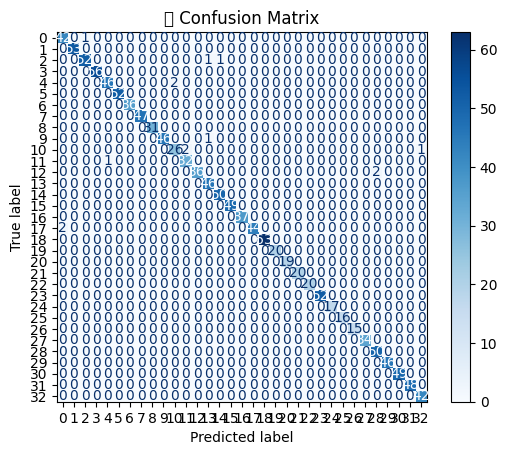


📊 Original samples: 6564
✅ Used for training: 6530
❌ Rejected due to inconsistent length: 34


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, ConfusionMatrixDisplay
)

# ✅ Load data from the pickle file
with open('/data1.pickle', 'rb') as f:
    data_dict = pickle.load(f)

raw_data = data_dict['data']
labels = np.array(data_dict['labels'])

# ✅ Ensure all samples are of equal length
expected_length = len(raw_data[0])
valid_data = []
valid_labels = []
rejected_count = 0

for d, label in zip(raw_data, labels):
    if len(d) == expected_length:
        valid_data.append(np.array(d).flatten())
        valid_labels.append(label)
    else:
        rejected_count += 1

X = np.array(valid_data)
y = np.array(valid_labels)

# ✅ Split the dataset
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# ✅ GridSearchCV for best hyperparameters
param_grid = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [10, 15, 20, 25, 30],
    'min_samples_split': [2, 4, 5, 6, 7],
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1, verbose=2)

print("🔍 Training model with GridSearchCV...")
grid_search.fit(x_train, y_train)

# ✅ Best model and predictions
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
y_pred = best_model.predict(x_test)
final_accuracy = accuracy_score(y_test, y_pred)

# ✅ Compute training score (accuracy on training set)
train_score = best_model.score(x_train, y_train)

# ✅ Compute loss (1 - accuracy for simplicity, adjust if you have a loss function)
train_loss = 1 - train_score
val_loss = 1 - final_accuracy

# ✅ Compute precision, recall, and f1
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# ✅ Save best model and metrics
with open('model7.p', 'wb') as f:
    pickle.dump({
        'model': best_model,
        'train_score': train_score,
        'train_loss': train_loss,
        'val_loss': val_loss,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }, f)

# ✅ Print metrics
print("\n🎯 Best Hyperparameters:")
print(best_params)
print(f"🏆 Final Accuracy: {final_accuracy * 100:.2f}%")
print(f"🎯 Train Score: {train_score * 100:.2f}%")
print(f"🔴 Train Loss: {train_loss * 100:.2f}%")
print(f"🔴 Validation Loss: {val_loss * 100:.2f}%")
print(f"🎯 Precision: {precision * 100:.2f}%")
print(f"🔁 Recall:    {recall * 100:.2f}%")
print(f"📐 F1 Score:  {f1 * 100:.2f}%")

# ✅ Classification report
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred))

# ✅ Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("🔍 Confusion Matrix")
plt.show()

# ✅ Summary
print("\n📊 Original samples:", len(raw_data))
print("✅ Used for training:", len(valid_data))
print("❌ Rejected due to inconsistent length:", rejected_count)

# ✅ استخراج نتائج GridSearchCV
cv_results = grid_search.cv_results_

n_estimators_list = cv_results['param_n_estimators'].data
mean_train_scores = cv_results['mean_train_score'] if 'mean_train_score' in cv_results else None
mean_val_scores = cv_results['mean_test_score']
val_losses = 1 - np.array(mean_val_scores)

from google.colab import files
files.download('model7.p')